In [1]:
import numpy as np
import pandas as pd
import cv2
import random
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mostCommon import most_common, displayer
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
my_data = pd.read_csv('../data/Five_Frames_Per_patient.csv')
patients_data=pd.read_csv('../data/videos_data.csv')
data_array = my_data.to_numpy()
patients_array=patients_data["FileName"].to_numpy()
images_path = '../data/Five_Frames_Per_patient/'
no_of_test_patients=math.floor(patients_array.size*0.2) 
images_data = []
models = []

In [3]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

In [4]:
df=my_data
data_array=df.to_numpy()
for i in data_array:
    img = cv2.imread(images_path + i[0] + '.' + i[2], cv2.IMREAD_GRAYSCALE)
    img = cv2.equalizeHist(img)
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    img_1d = img.reshape(224 * 224)
    images_data.append(img_1d)
X=np.asarray(images_data)
y = np.asarray(my_data['Label'])

number = preprocessing.LabelEncoder()
y=number.fit_transform(y)

In [5]:
l=0
ll=[0,1,2,3,4]
ll=[t+l for t in ll]
print(ll)
X_test=np.take(X,ll,axis=0)
y_test=np.take(y,ll)
X_train=np.delete(X,ll,axis=0)
y_train=np.delete(y,ll)
print(len(X_test))
print(len(y_test))
print(len(X_train))
print(len(y_train))

[0, 1, 2, 3, 4]
5
5
605
605


In [15]:
frame_pred=[]
patient_pred=[]
l=5
ll=[-5,-4,-3,-2,-1]
for o in range(10):
    print('---------------------------- Patient ' + str(o) + ' ------------------------------ \n')
    ll=[t+l for t in ll]
    print('Indexes: '+str(ll))
    X_test=np.take(X,ll,axis=0)
    y_test=np.take(y,ll)
    X_train=np.delete(X,ll,axis=0)
    y_train=np.delete(y,ll)
    
    model=RandomForestClassifier(max_depth=10000, random_state=42)
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    
    frame_pred.append(prediction)
    patient_pred.append(most_common(prediction))
    
    

print('All Done :)')

---------------------------- Patient 0 ------------------------------ 

Indexes: [0, 1, 2, 3, 4]
---------------------------- Patient 1 ------------------------------ 

Indexes: [5, 6, 7, 8, 9]
---------------------------- Patient 2 ------------------------------ 

Indexes: [10, 11, 12, 13, 14]
---------------------------- Patient 3 ------------------------------ 

Indexes: [15, 16, 17, 18, 19]
---------------------------- Patient 4 ------------------------------ 

Indexes: [20, 21, 22, 23, 24]
---------------------------- Patient 5 ------------------------------ 

Indexes: [25, 26, 27, 28, 29]
---------------------------- Patient 6 ------------------------------ 

Indexes: [30, 31, 32, 33, 34]
---------------------------- Patient 7 ------------------------------ 

Indexes: [35, 36, 37, 38, 39]
---------------------------- Patient 8 ------------------------------ 

Indexes: [40, 41, 42, 43, 44]
---------------------------- Patient 9 ------------------------------ 

Indexes: [45, 46, 47

---------------------------- Patient 77 ------------------------------ 

Indexes: [385, 386, 387, 388, 389]
---------------------------- Patient 78 ------------------------------ 

Indexes: [390, 391, 392, 393, 394]
---------------------------- Patient 79 ------------------------------ 

Indexes: [395, 396, 397, 398, 399]
---------------------------- Patient 80 ------------------------------ 

Indexes: [400, 401, 402, 403, 404]
---------------------------- Patient 81 ------------------------------ 

Indexes: [405, 406, 407, 408, 409]
---------------------------- Patient 82 ------------------------------ 

Indexes: [410, 411, 412, 413, 414]
---------------------------- Patient 83 ------------------------------ 

Indexes: [415, 416, 417, 418, 419]
---------------------------- Patient 84 ------------------------------ 

Indexes: [420, 421, 422, 423, 424]
---------------------------- Patient 85 ------------------------------ 

Indexes: [425, 426, 427, 428, 429]
----------------------------

In [7]:
patient_test=[]
i=0
while i<610:
    patient_test.append(y[i])
    i=i+5


In [17]:
print(len(y_pred))

610


RFC Frame level F1 Score
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     1.000        36
           2      1.000     1.000     1.000        56

    accuracy                          1.000       122
   macro avg      1.000     1.000     1.000       122
weighted avg      1.000     1.000     1.000       122

[[30  0  0]
 [ 0 36  0]
 [ 0  0 56]]


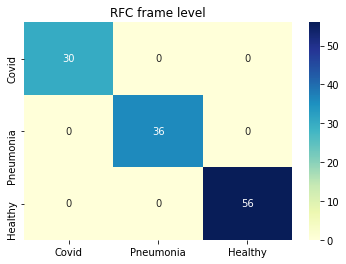

RFC Patient level F1 Score
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     1.000        36
           2      1.000     1.000     1.000        56

    accuracy                          1.000       122
   macro avg      1.000     1.000     1.000       122
weighted avg      1.000     1.000     1.000       122



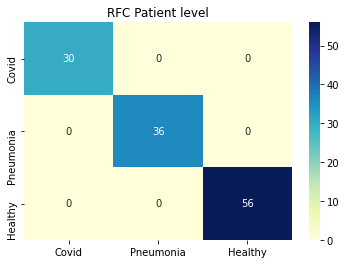

In [8]:
displayer(patient_test,patient_test,patient_test,patient_test,'RFC')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_pred))